# Same as 221024_build_dataset.ipynb
- Organized version

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil, tqdm, glob, h5py, mat73, imageio, napari
from pathlib import Path
from scipy.io import loadmat
from tqdm import notebook

# h5_dir_1 = Path(r'C:\Users\shires\Dropbox\Works\Projects\2020 Neural stretching in S1\Data\h5')
# h5_dir_2 = Path(r'C:\Users\shires\Dropbox\Works\Projects\2020 Neural stretching in S1\Data\h5')
h5_dir = Path('E:\TPM\JK\h5')
b_dir = Path('E:\TPM\JK\SoloData')
w_dir = Path('E:\TPM\JK\WhiskerVideo')
mice =          [25,    27,   30,   36,     37,     38,     39,     41,     52,     53,     54,     56]
# refSessions =   [4,     3,    3,    1,      7,      2,      1,      3,      3,      3,      3,      3]
# expSessions =   [19,    10,   21,   17,     0,      0,      23,     0,      21,     0,      0,      0]
# zoom =          [2,     2,    2,    1.7,    1.7,    1.7,    1.7,    1.7,    1.7,    1.7,    1.7,    1.7]
image_rate_list = [30.8359, 30.8359, 30.8359, 30.8359, 
                    24.2892, 24.2892, 24.2892, 24.2892,
                    30.8359, 30.8359, 30.8359, 30.8359] # from .mat file (sbx)
image_size_list = [[512,796], [512,796], [512,796], [512,796], 
                    [650,796], [650,796], [650,796], [650,796], 
                    [512,796], [512,796], [512,796], [512,796]] # from .mat file (sbx)

planes = range(1,9)

# mice =          [25,    27,   30,   36,     39,     52]
# refSessions =   [4,     3,    3,    1,      1,      3]
# expSessions =   [19,    10,   21,   17,     23,     21]
# zoom =          [2,     2,    2,    1.7,    1.7,    1.7]
# freq =          [7.7,   7.7,  7.7,  7.7,    6.1,    7.7]

# Making whisker pkl files
- Done for all 12 mice

In [ ]:
for mouse in notebook.tqdm(mice):
    session_folder_list = glob.glob(str(w_dir / f'JK{mouse:03d}S*'))
    for session_folder in notebook.tqdm(session_folder_list):
        session_name = session_folder.split('\\')[-1]
        wf_fn = w_dir / session_name / f'{session_name}_whisker_final_h5.mat'
        whisker_pkl_fn = w_dir / session_name / f'{session_name}_whisker.pkl'
        # if not os.path.isfile(whisker_pkl_fn):
        if os.path.isfile(wf_fn):
            w_data = mat73.loadmat(wf_fn)
            dict_keys = list(w_data['hw']['trials'][1].keys())
            whisker_df = pd.DataFrame(columns=dict_keys)
            num_trials = len(w_data['hw']['trials'])
            for i in range(num_trials):
                trial_data = w_data['hw']['trials'][i]
                trial_df = pd.DataFrame({})
                for key in dict_keys:
                    trial_df[key] = [trial_data[key]]
                whisker_df = whisker_df.append(trial_df)
            whisker_df['mouse_name'] = w_data['hw']['mouse_name']
            whisker_df['session_name'] = w_data['hw']['session_name']
            whisker_df.rename(columns={'time': 'whisker_time'}, inplace=True)
            whisker_df['trialNum'] = whisker_df['trialNum'].astype(int)
            whisker_df['poleAngle'] = whisker_df['poleAngle'].astype(int)
            whisker_df['poleDistance'] = whisker_df['poleDistance'].astype(int)
            whisker_df.set_index('trialNum', inplace=True)
            whisker_df.to_pickle(whisker_pkl_fn)
# All mice takes about 3 hr

In [34]:
# One session
session_name = 'JK036S01'
wf_fn = w_dir / session_name / f'{session_name}_whisker_final_h5.mat'
whisker_pkl_fn = w_dir / session_name / f'{session_name}_whisker.pkl'

w_data = mat73.loadmat(wf_fn)
dict_keys = list(w_data['hw']['trials'][1].keys())
whisker_df = pd.DataFrame(columns=dict_keys)
num_trials = len(w_data['hw']['trials'])
for i in range(num_trials):
    trial_data = w_data['hw']['trials'][i]
    trial_df = pd.DataFrame({})
    for key in dict_keys:
        trial_df[key] = [trial_data[key]]
    whisker_df = whisker_df.append(trial_df)
whisker_df['mouse_name'] = w_data['hw']['mouse_name']
# whisker_df['session_name'] = w_data['hw']['session_name']
whisker_df['session_name'] = 'S01'
whisker_df.rename(columns={'time': 'whisker_time'}, inplace=True)
whisker_df['trialNum'] = whisker_df['trialNum'].astype(int)
whisker_df['poleAngle'] = whisker_df['poleAngle'].astype(int)
whisker_df['poleDistance'] = whisker_df['poleDistance'].astype(int)
whisker_df.set_index('trialNum', inplace=True)
whisker_df.to_pickle(whisker_pkl_fn)

In [35]:
whisker_df

,amplitude,arcLength,kappaH,kappaV,midpoint,phase,phi,poleAngle,poleDistance,poleMovingFrames,...,retractionSlideByWhisking,retractionTFchunks,retractionTFchunksByWhisking,retractionTouchDuration,retractionTouchDurationByWhisking,theta,whisker_time,whiskingStartFrames,mouse_name,session_name
trialNum,,,,,,,,,,,,,,,,,,,,,
2,"[4.391960067252804, 5.597563003733599, 6.18500...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.054420602636806405, 0.05251144755241868, 0....","[-0.06947369641819937, -0.06817236679970784, -...","[-25.751709784336967, -25.22564835669049, -24....","[-1.5542170880941948, -1.318046276091665, -1.1...","[19.360403139095407, 16.208560628514842, 16.90...",105,100000,"[407.0, 408.0, 409.0, 410.0, 411.0, 412.0, 413...",...,[],[],[],"[0, 0]","[0, 0]","[-26.35555069622304, -25.208502870458798, -21....","[0.0, 0.003213, 0.006426, 0.009639, 0.012852, ...","[1.0, 33.0, 66.0, 79.0, 113.0, 150.0, 224.0, 2...",JK036,S01
3,"[1.088632945181013, 1.3810117782387321, 1.4655...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.06235526035357359, 0.06105812919221163, 0.0...","[-0.07114741408257189, -0.0695647509446755, -0...","[-23.012975961679775, -23.07590435623647, -23....","[1.6355903105184673, 1.9895611822913042, 2.309...","[18.63342000723596, 19.21285035489412, 19.6518...",60,100000,"[360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366...",...,[],[],[],"[0, 0]","[0, 0]","[-23.04066657290666, -23.810552309659727, -24....","[0.0, 0.003213, 0.006426, 0.009639, 0.012852, ...","[429.0, 481.0, 502.0, 544.0, 573.0, 602.0, 619...",JK036,S01
4,"[5.878561076182265, 7.779084401321589, 9.18422...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.05546953018930168, 0.05871622647507989, 0.0...","[-0.053629791794256663, -0.053041355486173836,...","[27.013007727760115, 24.815126782611014, 22.57...","[1.4651310214785407, 1.6151645218485495, 1.770...","[12.285869372512968, 12.605097775079061, 12.98...",60,100000,"[360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366...",...,[],[],[],"[0, 0]","[0, 0]","[29.784934489508395, 29.46450437945247, 25.484...","[0.0, 0.003213, 0.006426, 0.009639, 0.012852, ...","[1.0, 10.0, 60.0, 96.0, 135.0, 167.0, 351.0, 5...",JK036,S01
5,"[16.178368297476432, 19.991704428079068, 20.55...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.05236932449985299, 0.053338220933674886, 0....","[-0.060399348809835655, -0.06568935537512433, ...","[10.199416569729406, 9.838102830223717, 9.4779...","[1.631810684934547, 1.957910956130097, 2.26602...","[9.407307375380368, 11.216686146645703, 11.775...",60,100000,"[362.0, 363.0, 364.0, 365.0, 366.0, 367.0, 368...",...,"[[0.0, 0.08326438639484753, 0.2044415816647746...","[[918.0, 919.0, 920.0, 921.0, 922.0], [986.0, ...","[[918.0, 919.0, 920.0, 921.0, 922.0], [986.0, ...","[0.016065000000000086, 0.03212999999999986]","[0.016065000000000086, 0.019277999999999774]","[9.473471150643263, 1.8163206637281872, -8.133...","[0.0, 0.003213, 0.006426, 0.009639, 0.012852, ...","[1.0, 7.0, 40.0, 68.0, 91.0, 116.0, 134.0, 159...",JK036,S01
6,"[0.7397984780339745, 0.9574674590768897, 1.267...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.04549219875423843, 0.040120922197313, 0.040...","[-0.07798980507699659, -0.076225664651813, -0....","[-6.825788619710469, -6.984839538594274, -7.14...","[-1.149055596586971, -1.3359808861226479, -1.3...","[18.82427347828557, 17.96655199199982, 17.2428...",90,100000,"[365.0, 366.0, 367.0, 368.0, 369.0, 370.0, 371...",...,[],[],[],"[0, 0]","[0, 0]","[-6.447328074125255, -6.187464922038061, -6.83...","[0.0, 0.003213, 0.006426, 0.009639, 0.012852, ...","[1.0, 38.0, 71.0, 155.0, 179.0, 218.0, 264.0, ...",JK036,S01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,"[0.46067850369666763, 0.4597373465445981, 0.58...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.049439688013654955, 0.04954896041390199, 0....","[-0.0735721901867555, -0.07447308303255969, -0...","[-16.121213766009678, -16.14

# Making behavior pkl files
- Done for all 12 mice

In [ ]:
for mouse in notebook.tqdm(mice):
    b_fn = b_dir / f'JK{mouse:03d}' / f'behavior_JK{mouse:03d}_h5.mat'
    if os.path.isfile(b_fn):
        behavior_data = mat73.loadmat(b_fn)

        num_sessions = len(behavior_data['hb']['sessions'])
        mouse_name = behavior_data['hb']['mouse_name']
        for si in range(num_sessions):
            session_name = behavior_data['hb']['sessions'][si]['sessionName']
            if 'pre' in session_name:
                pre_session_num = session_name.split('pre')[1]
                session_name = f'S9{pre_session_num}'
            b_session_pkl_fn = b_dir / f'JK{mouse:03d}' / f'{mouse_name}{session_name}_behavior.pkl'
            # if not os.path.isfile(b_session_pkl_fn):
            keys = list(behavior_data['hb']['sessions'][si]['trials'][0].keys())    
            b_df = pd.DataFrame(columns=keys)
            num_trials = len(behavior_data['hb']['sessions'][si]['trials'])
            for ti in range(num_trials):
                trial_data = behavior_data['hb']['sessions'][si]['trials'][ti]
                trial_df = pd.DataFrame({})
                for key in keys:
                    trial_df[key] = [trial_data[key]]
                    if key == 'answerLickTime':
                        if np.size(trial_data[key])==2:
                            trial_df[key] = 0
                    if key == 'beamBreakTimesLeft' or 'beamBreakTimesRight':
                        if np.size(trial_data[key])==1:
                            trial_df[key] = np.asarray(np.array([[trial_data[key]]]))
                        elif (len(trial_data[key]) == 2 ) and (trial_data[key][0]==0) and (trial_data[key][1]==1):
                            trial_df[key] = np.asarray(np.array([0]))
                b_df = b_df.append(trial_df)
            b_df['mouse_name'] = mouse_name
            b_df['session_name'] = behavior_data['hb']['sessions'][si]['sessionName']
            b_df['session_type'] = behavior_data['hb']['sessions'][si]['sessionType']
            b_df['task_target'] = behavior_data['hb']['sessions'][si]['taskTarget']
            b_df['distractor'] = behavior_data['hb']['sessions'][si]['distractor']
            b_df['trialNum'] = b_df['trialNum'].astype(int)
            b_df['servoAngle'] = b_df['servoAngle'].astype(int)
            b_df['motorDistance'] = b_df['motorDistance'].astype(int)
            b_df['motorApPosition'] = b_df['motorApPosition'].astype(int)
            b_df.set_index('trialNum', inplace=True)

            b_df.to_pickle(b_session_pkl_fn)
# All mice takes about 63 min

### Behavior pkl file QC

In [ ]:
# Compare all mice and sessions automatically
for mouse in mice:
    b_fn = b_dir / f'JK{mouse:03d}' / f'behavior_JK{mouse:03d}_h5.mat'
    behavior_data = mat73.loadmat(b_fn)
    
    num_sessions = len(behavior_data['hb']['sessions'])
    mouse_name = behavior_data['hb']['mouse_name']
    for si in range(num_sessions):
        mat_trial_nums = np.array([trial['trialNum'] for trial in behavior_data['hb']['sessions'][si]['trials']])
        session_name = behavior_data['hb']['sessions'][si]['sessionName']
        if 'pre' in session_name:
            pre_session_num = session_name.split('pre')[1]
            session_name = f'S9{pre_session_num}'
        b_session_pkl_fn = b_dir / f'JK{mouse:03d}' / f'{mouse_name}{session_name}_behavior.pkl'

        b_df = pd.read_pickle(b_session_pkl_fn)
        pkl_trial_nums = b_df.index.values

        if not np.array_equiv(mat_trial_nums, pkl_trial_nums):
            print(f'Error in {mouse_name} {session_name}')


# Write pkl files for 2p frame times

In [ ]:
expert_mice_ind = [0,1,2,3,6,8]

for emi in range(3,6):
    mi = expert_mice_ind[emi]
    # if emi < 3:
    #     h5_dir = h5_dir_1
    # else:
    #     h5_dir = h5_dir_2
    mouse = mice[mi]
    image_rate = image_rate_list[mi]
    image_size = image_size_list[mi]

    for top_plane_ind in [0,4]:
        plane = planes[top_plane_ind]
        plane_dir = h5_dir / f'{mouse:03d}' / f'plane_{plane}'
        sts_reg = np.load(plane_dir / f'JK{mouse:03d}_plane{plane}_session_to_session_registration.npy', allow_pickle=True).item()
        session_nums = sts_reg['selected_session_num']
        # This info is valid in pi:pi+4

        for session_num in session_nums:
            trial_start_end = []
            plane_frames = [[],[],[],[]] # 4 planes per volume
            ophys_trial_fn_list = glob.glob(str(h5_dir / f'{mouse:03d}' / f'{mouse:03d}_{session_num:03d}_0*.trials')) # sometimes there are multiple trials files because of random scanbox stoppage error
            for fn in ophys_trial_fn_list:
                ophys_trial = loadmat(fn, simplify_cells=True)
                trial_start_end.extend(ophys_trial['trials'])
                for pi in range(4):
                    plane_frames[pi].extend(ophys_trial['frame_to_use'][top_plane_ind+pi])

            #############################################        
            # Exception to handle I/O error from BControl
            if (mouse == 27) and (session_num == 12):
                trial_start_end = trial_start_end[:-1]

            plane_df_list = [pd.DataFrame(columns=['trialNum', 'frame_start_time', 'frame_end_time', 'trial_duration', 'frame_index']), # trial_duration for trial length QC
                            pd.DataFrame(columns=['trialNum', 'frame_start_time', 'frame_end_time', 'trial_duration', 'frame_index']),
                            pd.DataFrame(columns=['trialNum', 'frame_start_time', 'frame_end_time', 'trial_duration', 'frame_index']),
                            pd.DataFrame(columns=['trialNum', 'frame_start_time', 'frame_end_time', 'trial_duration', 'frame_index'])]
            for trial in trial_start_end:
                trial_num = trial['trialnum']
                if np.isfinite(trial_num): # there was a case where trialnum was NaN, and corresponding frames were > 2000 frames in len
                    # Happened only in 025_006_000.trials (d230104_trial_num_nan_check.m)
                    # Not checked for non-experts.
                    # Add frame index (index of frame_to_use)
                    # Does not need to remove corresponding frames from calcium data, because frame_to_use were collected by matching 'trialnum', so
                    # 'NaN' trialnum were not assigned.
                    # Thus, total # of rows in the dataframe matches to the last frame index.
                    trial_start_frame = trial['frames'][0]
                    trial_end_frame = trial['frames'][1]
                    trial_start_line = trial['lines'][0] # 1-based index from MATLAB, not 0-based index
                    trial_end_line = trial['lines'][1]
                    # Find indice for this trial from the plane
                    plane_frame_inds_trial = []
                    for pi in range(4):
                        plane_frame_inds_trial.append(np.where((plane_frames[pi] >= trial['frames'][0]) & (plane_frames[pi] <= trial['frames'][1]))[0].astype(int))
                    len_frames = np.array([len(f) for f in plane_frame_inds_trial])
                    assert (len_frames[1:] - len_frames[0]).any() == False # to confirm that each plane shared the same # of frames

                    # Make per trial DataFrame in each plane
                    for pi in range(4):
                        # Calculate start and end time for each frame
                        plane_frame_trial = np.asarray(plane_frames[pi])[plane_frame_inds_trial[pi]]
                        start_tmp = list((plane_frame_trial - trial_start_frame + (trial_start_line - 1) / image_size[0]) / image_rate)
                        end_tmp = list((plane_frame_trial - trial_start_frame + 1 + (trial_start_line - 1) / image_size[0]) / image_rate) #
                            # end_time should include the end of the last line 
                            # It matches to the next frame (next plane) start time
                            # TTL signal is assumed to have arrived at the beginning of the line
                        trial_df_tmp = pd.DataFrame()
                        trial_df_tmp['frame_start_time'] = start_tmp
                        trial_df_tmp['frame_end_time'] = end_tmp
                        trial_df_tmp['trialNum'] = trial_num
                        # Calculate trial duration
                        trial_duration = (trial_end_frame - trial_start_frame + (trial_end_line - trial_start_line) / image_size[0]) / image_rate
                        trial_df_tmp['trial_duration'] = trial_duration
                        trial_df_tmp['frame_index'] = plane_frame_inds_trial[pi]

                        plane_df_list[pi] = plane_df_list[pi].append(trial_df_tmp)
            # Reset index for all the frames and save to pkl file
            for pi in range(4):
                plane_df_list[pi].reset_index(drop=True, inplace=True)
                plane = planes[top_plane_ind+pi]
                plane_dir= h5_dir / f'{mouse:03d}' / f'plane_{plane}' 
                pkl_fn =  f'{mouse:03d}_{session_num:03d}_plane_{plane}_frame_time.pkl'
                plane_df_list[pi].to_pickle(plane_dir / pkl_fn)

### QC 2p time frame pkl

In [ ]:
# QC by comparing trial nums between pkl file and .trials file
mouse = 27
session_num = 3
plane = 5

ophys_trial_fn_list = glob.glob(str(h5_dir / f'{mouse:03d}' / f'{mouse:03d}_{session_num:03d}_0*.trials')) # sometimes there are multiple trials files because of random scanbox stoppage error
trial_start_end = []
plane_frames = [[],[],[],[]]
layer_trials = np.zeros(1,)
for fn in ophys_trial_fn_list:
    ophys_trial = loadmat(fn, simplify_cells=True)
    if plane < 5:
        layer_trials = np.concatenate((layer_trials, ophys_trial['layer_trials'][0]))
    else:
        layer_trials = np.concatenate((layer_trials, ophys_trial['layer_trials'][1]))
    trial_start_end.extend(ophys_trial['trials'])
    for pi in range(4):
        plane_frames[pi].extend(ophys_trial['frame_to_use'][top_plane_ind+pi])

plane_dir= h5_dir / f'{mouse:03d}' / f'plane_{plane}' 
pkl_fn =  f'{mouse:03d}_{session_num:03d}_plane_{plane}_frame_time.pkl'
frame_time_df = pd.read_pickle(plane_dir / pkl_fn)

trial_num_pkl = frame_time_df.trialNum.unique()
print(np.setdiff1d(trial_num_pkl, layer_trials))
print(np.setdiff1d(layer_trials, trial_num_pkl))
print(layer_trials[-1])

In [37]:
def merge_whisker_to_frame_df(frame_time_df, whisker_df):
    # Initialization
    # touch onset features
    kappaH_onset = np.empty(len(frame_time_df))
    kappaH_onset[:] = np.nan
    kappaV_onset = np.empty(len(frame_time_df))
    kappaV_onset[:] = np.nan
    phi_onset = np.empty(len(frame_time_df))
    phi_onset[:] = np.nan
    theta_onset = np.empty(len(frame_time_df))
    theta_onset[:] = np.nan
    arc_length_onset = np.empty(len(frame_time_df))
    arc_length_onset[:] = np.nan
    touch_count = np.empty(len(frame_time_df))
    touch_count[:] = np.nan
    # during touch features
    delta_kappaH = np.empty(len(frame_time_df))
    delta_kappaH[:] = np.nan
    delta_kappaV = np.empty(len(frame_time_df))
    delta_kappaV[:] = np.nan
    delta_phi = np.empty(len(frame_time_df))
    delta_phi[:] = np.nan
    delta_theta = np.empty(len(frame_time_df))
    delta_theta[:] = np.nan
    slide_distance = np.empty(len(frame_time_df))
    slide_distance[:] = np.nan
    touch_duration = np.empty(len(frame_time_df))
    touch_duration[:] = np.nan
    # pole frame
    pole_up_frame = np.zeros(len(frame_time_df))
    pole_moving_frame = np.zeros(len(frame_time_df))

    trial_nums = frame_time_df.trialNum.unique()
    whisker_empty_trial_nums = []
    for trial_num in trial_nums:
        # 2p frame index and time
        trial_2p_index = np.where(frame_time_df.trialNum==trial_num)[0]
        trial_2p_time = frame_time_df.frame_end_time.values[trial_2p_index] # end-to-end frame allocation
        # First frame can be quite long, but there is no way that touch happened on the first frame
        # whisker touch time
        trial_whisker_series = whisker_df[whisker_df.index==trial_num]

        if len(trial_whisker_series) == 0: # No whisker processing (or error in the video, etc.)
            whisker_empty_trial_nums.append(trial_num)
        else:
            trial_whisker_time = trial_whisker_series.whisker_time.values[0]

            trial_kappaH = trial_whisker_series.kappaH.values[0]
            trial_kappaV = trial_whisker_series.kappaV.values[0]
            trial_phi = trial_whisker_series.phi.values[0]
            trial_theta = trial_whisker_series.theta.values[0]
            trial_arc_length = trial_whisker_series.arcLength.values[0]

            if trial_whisker_series.trialType.values[0] != 'oo':  # 'oo' denotes out of reach pole up trials. No touch happened, and no pole up could be detected from the video reliably.

                trial_protraction_touch_chunks = trial_whisker_series.protractionTFchunksByWhisking.values[0] # when touch frame chunks by whisking were used
                # trial_protraction_touch_chunks = trial_whisker_series.protractionTFchunks.values[0] # in case when touch frame chunks were used
                if len(trial_protraction_touch_chunks)>0:
                    assert len(trial_protraction_touch_chunks) == len(trial_whisker_series.protractionSlideByWhisking.values[0])
                    # touch_onset_times = [trial_whisker_time[touch_chunks[0].astype(int)-1] for touch_chunks in trial_protraction_touch_chunks]
                    for touch_ind, touch_chunk_whisker_index in enumerate(trial_protraction_touch_chunks):
                        if np.ndim(touch_chunk_whisker_index) == 0:
                            touch_chunk_whisker_index = np.asarray([touch_chunk_whisker_index])
                        touch_chunk_whisker_index = touch_chunk_whisker_index.astype(int)-1 # correcting 1-based MATLAB index to 0-based python index
                        touch_onset_time = trial_whisker_time[touch_chunk_whisker_index[0]]
                        touch_onset_2p_index = np.where(trial_2p_time>touch_onset_time)[0][0]

                        # Assign touch onset features
                        kappaH_first = trial_kappaH[touch_chunk_whisker_index[0]]
                        kappaV_first = trial_kappaV[touch_chunk_whisker_index[0]]
                        phi_first = trial_phi[touch_chunk_whisker_index[0]]
                        theta_first = trial_theta[touch_chunk_whisker_index[0]]

                        if np.isnan(kappaH_onset[trial_2p_index[touch_onset_2p_index]]):
                            kappaH_onset[trial_2p_index[touch_onset_2p_index]] = kappaH_first 
                        else:
                            kappaH_onset[trial_2p_index[touch_onset_2p_index]] += kappaH_first 
                        if np.isnan(kappaV_onset[trial_2p_index[touch_onset_2p_index]]):
                            kappaV_onset[trial_2p_index[touch_onset_2p_index]] = kappaV_first
                        else:
                            kappaV_onset[trial_2p_index[touch_onset_2p_index]] += kappaV_first
                        if np.isnan(phi_onset[trial_2p_index[touch_onset_2p_index]]):
                            phi_onset[trial_2p_index[touch_onset_2p_index]] = phi_first
                        else:
                            phi_onset[trial_2p_index[touch_onset_2p_index]] += phi_first
                        if np.isnan(theta_onset[trial_2p_index[touch_onset_2p_index]]):
                            theta_onset[trial_2p_index[touch_onset_2p_index]] = theta_first
                        else:
                            theta_onset[trial_2p_index[touch_onset_2p_index]] += theta_first
                        
                        if np.isnan(arc_length_onset[trial_2p_index[touch_onset_2p_index]]):
                            arc_length_onset[trial_2p_index[touch_onset_2p_index]] = trial_arc_length[touch_chunk_whisker_index[0]]
                        else:
                            arc_length_onset[trial_2p_index[touch_onset_2p_index]] += trial_arc_length[touch_chunk_whisker_index[0]]
                        if np.isnan(touch_count[trial_2p_index[touch_onset_2p_index]]):
                            touch_count[trial_2p_index[touch_onset_2p_index]] = 1
                        else:
                            touch_count[trial_2p_index[touch_onset_2p_index]] += 1

                        # Assign during touch features
                        touch_offset_time = trial_whisker_time[touch_chunk_whisker_index[-1]]
                        touch_offset_2p_index = np.where(trial_2p_time>touch_offset_time)[0][0]
                        slide_distance_trial = trial_whisker_series.protractionSlideByWhisking.values[0][touch_ind]
                        if np.ndim(slide_distance_trial) == 0:
                            slide_distance_trial = np.asarray([slide_distance_trial])
                        for touch_2p_index in range(touch_onset_2p_index,touch_offset_2p_index+1):
                            # kappaH, kappaV, phi, theta, requires calculating max values within the frame, compared to the first value
                            current_2p_frame_end_time = trial_2p_time[touch_2p_index]
                            if trial_whisker_time[touch_chunk_whisker_index[-1]] > current_2p_frame_end_time: # when the current touch chunk ends later than the current 2p frame end time
                                last_whisker_index_within_frame = np.where(trial_whisker_time[touch_chunk_whisker_index] > current_2p_frame_end_time)[0][0] # excluding this index
                            else:
                                last_whisker_index_within_frame = len(touch_chunk_whisker_index) # excluding this index
                            
                            kappaH_within_frame = trial_kappaH[touch_chunk_whisker_index[:last_whisker_index_within_frame]]
                            if np.isnan(delta_kappaH[trial_2p_index[touch_2p_index]]):
                                delta_kappaH[trial_2p_index[touch_2p_index]] = np.amin(kappaH_within_frame - kappaH_first) # For protraction touch, only negative values are allowed
                            else:
                                delta_kappaH[trial_2p_index[touch_2p_index]] += np.amin(kappaH_within_frame - kappaH_first)

                            kappaV_within_frame = trial_kappaV[touch_chunk_whisker_index[:last_whisker_index_within_frame]]
                            if np.isnan(delta_kappaV[trial_2p_index[touch_2p_index]]):
                                delta_kappaV[trial_2p_index[touch_2p_index]] = np.amax(np.abs(kappaV_within_frame - kappaV_first)) * np.sign(kappaV_within_frame[np.argmax(np.abs(kappaV_within_frame - kappaV_first))] - kappaV_first)
                            else:
                                delta_kappaV[trial_2p_index[touch_2p_index]] += np.amax(np.abs(kappaV_within_frame - kappaV_first)) * np.sign(kappaV_within_frame[np.argmax(np.abs(kappaV_within_frame - kappaV_first))] - kappaV_first)

                            phi_within_frame = trial_phi[touch_chunk_whisker_index[:last_whisker_index_within_frame]]
                            if np.isnan(delta_phi[trial_2p_index[touch_2p_index]]):
                                delta_phi[trial_2p_index[touch_2p_index]] = np.amax(np.abs(phi_within_frame - phi_first)) * np.sign(phi_within_frame[np.argmax(np.abs(phi_within_frame - phi_first))] - phi_first)
                            else:
                                delta_phi[trial_2p_index[touch_2p_index]] += np.amax(np.abs(phi_within_frame - phi_first)) * np.sign(phi_within_frame[np.argmax(np.abs(phi_within_frame - phi_first))] - phi_first)
                            
                            theta_within_frame = trial_theta[touch_chunk_whisker_index[:last_whisker_index_within_frame]]
                            if np.isnan(delta_theta[trial_2p_index[touch_2p_index]]):
                                delta_theta[trial_2p_index[touch_2p_index]] = np.amax(theta_within_frame - theta_first) # For protraction touch, only positive values are allowed
                            else:
                                delta_theta[trial_2p_index[touch_2p_index]] += np.amax(theta_within_frame - theta_first)

                            # Slide distance already calculated per whisker time frame, so only requires calculating max values within the frame
                            slide_distance_within_frame = slide_distance_trial[:last_whisker_index_within_frame]
                            if np.isnan(slide_distance[trial_2p_index[touch_2p_index]]):
                                slide_distance[trial_2p_index[touch_2p_index]] = np.amax(slide_distance_within_frame)
                            else:
                                slide_distance[trial_2p_index[touch_2p_index]] += np.amax(slide_distance_within_frame)

                            # Touch duration
                            if np.isnan(touch_duration[trial_2p_index[touch_2p_index]]):
                                touch_duration[trial_2p_index[touch_2p_index]] = trial_whisker_time[touch_chunk_whisker_index[last_whisker_index_within_frame-1]] - touch_onset_time
                            else:
                                touch_duration[trial_2p_index[touch_2p_index]] += trial_whisker_time[touch_chunk_whisker_index[last_whisker_index_within_frame-1]] - touch_onset_time
                
                # Adding pole-up frames and pole-moving frames
                pole_moving_time = trial_whisker_time[trial_whisker_series.poleMovingFrames.values[0].astype(int)-1]
                pole_up_time = trial_whisker_time[trial_whisker_series.poleUpFrames.values[0].astype(int)-1]
                pole_up_2p_frame_first_ind = np.where(trial_2p_time > pole_up_time[0])[0][0]

                if len(np.where(trial_2p_time > pole_up_time[-1])[0]) > 0:
                    pole_up_2p_frame_last_ind = np.where(trial_2p_time > pole_up_time[-1])[0][0]
                else:
                    pole_up_2p_frame_last_ind = len(trial_2p_time)-1
                pole_up_frame[trial_2p_index[pole_up_2p_frame_first_ind:pole_up_2p_frame_last_ind+1]] = 1

                pole_moving_2p_frame_first_ind = np.where(trial_2p_time > pole_moving_time[0])[0][0]
                pole_moving_frame[trial_2p_index[pole_moving_2p_frame_first_ind:pole_up_2p_frame_first_ind]] = 1

                if pole_moving_time[-1] > pole_up_time[-1]: # only when pole moving happened also after pole up
                    if len(np.where(trial_2p_time > pole_moving_time[-1])[0]) > 0:
                        pole_moving_2p_frame_last_ind = np.where(trial_2p_time > pole_moving_time[-1])[0][0]
                        pole_moving_frame[trial_2p_index[pole_up_2p_frame_last_ind+1:pole_moving_2p_frame_last_ind+1]] = 1

    # Adding whisker features to frame time DataFrame
    frame_time_df['kappaH_onset'] = kappaH_onset
    frame_time_df['kappaV_onset'] = kappaV_onset
    frame_time_df['phi_onset'] = phi_onset
    frame_time_df['theta_onset'] = theta_onset
    frame_time_df['arc_length_onset'] = arc_length_onset
    frame_time_df['touch_count'] = touch_count
    frame_time_df['delta_kappaH'] = delta_kappaH
    frame_time_df['delta_kappaV'] = delta_kappaV
    frame_time_df['delta_phi'] = delta_phi
    frame_time_df['delta_theta'] = delta_theta
    frame_time_df['slide_distance'] = slide_distance
    frame_time_df['touch_duration'] = touch_duration

    frame_time_df['pole_up_frame'] = pole_up_frame
    frame_time_df['pole_moving_frame'] = pole_moving_frame

    # Remove frames from trial_num that had error in whisker processing
    frame_time_df = frame_time_df[~np.isin(frame_time_df.trialNum.values, np.asarray(whisker_empty_trial_nums))]

    return frame_time_df

In [5]:
def merge_behavior_to_frame_df(frame_time_df, behavior_df):
    # Initialize
    pole_angle = np.zeros(len(frame_time_df), dtype=np.uint16)
    pole_ap_distance = np.zeros(len(frame_time_df), dtype=np.uint32)
    pole_radial_distance = np.zeros(len(frame_time_df), dtype=np.uint32)
    first_lick_frame = np.zeros(len(frame_time_df), dtype=bool)
    first_lick_left = np.zeros(len(frame_time_df), dtype=bool) # if first lick is right, then 0
    first_lick_right = np.zeros(len(frame_time_df), dtype=bool) # if first lick is left, then 0
    num_lick_left = np.zeros(len(frame_time_df), dtype=np.uint8)
    num_lick_right = np.zeros(len(frame_time_df), dtype=np.uint8)
    answer_lick_frame = np.zeros(len(frame_time_df), dtype=bool)
    answer_lick_left = np.zeros(len(frame_time_df), dtype=bool) # if answer lick is right, then 0
    answer_lick_right = np.zeros(len(frame_time_df), dtype=bool) # if answer lick is left, then 0
    pre_answer_pole_up_frame = np.zeros(len(frame_time_df), dtype=bool)
    answer_period_frame = np.zeros(len(frame_time_df), dtype=bool)
    post_answer_pole_up_frame = np.zeros(len(frame_time_df), dtype=bool)
    first_reward_lick_frame = np.zeros(len(frame_time_df), dtype=bool)
    first_reward_lick_left = np.zeros(len(frame_time_df), dtype=bool) # if first reward lick is right, then 0
    first_reward_lick_right = np.zeros(len(frame_time_df), dtype=bool) # if first reward lick is left, then 0
    correct = np.zeros(len(frame_time_df), dtype=bool)
    wrong = np.zeros(len(frame_time_df), dtype=bool)
    miss = np.zeros(len(frame_time_df), dtype=bool)
    trial_type = []
    task_target = []
    distractor = []

    trial_nums = frame_time_df.trialNum.unique()
    for trial_num in trial_nums:
        # 2p frame index and time
        trial_2p_index = np.where(frame_time_df.trialNum==trial_num)[0]
        trial_2p_time = frame_time_df.frame_end_time.values[trial_2p_index] # end-to-end frame allocation

        assert sum(behavior_df.index == trial_num)==1
        trial_behavior_series = behavior_df[behavior_df.index==trial_num].iloc[0]
        pole_angle[trial_2p_index] = trial_behavior_series.servoAngle
        pole_ap_distance[trial_2p_index] = trial_behavior_series.motorApPosition
        pole_radial_distance[trial_2p_index] = trial_behavior_series.motorDistance
        trial_type.extend([trial_behavior_series.trialType]*len(trial_2p_index))
        task_target.extend([trial_behavior_series.task_target]*len(trial_2p_index))
        distractor.extend([trial_behavior_series.distractor]*len(trial_2p_index))

        lick_times = np.empty(0,)
        left_lick_times = trial_behavior_series.beamBreakTimesLeft
        if np.size(left_lick_times)==1:
            left_lick_times = np.array([left_lick_times])    
        right_lick_times = trial_behavior_series.beamBreakTimesRight
        if np.size(right_lick_times)==1:
            right_lick_times = np.array([right_lick_times])
        answer_lick_time = trial_behavior_series.answerLickTime
        if answer_lick_time != 0: # answer trial
            if (answer_lick_time not in left_lick_times) and (answer_lick_time not in right_lick_times): # In some rare cases
                if trial_behavior_series.choice == 'r':
                    right_lick_times = np.union1d(answer_lick_time, right_lick_times)
                elif trial_behavior_series.choice == 'l':
                    left_lick_times = np.union1d(answer_lick_time, left_lick_times)
                else:
                    raise('When the answer lick time is not 0, there must have been either r or l choice.')

        if not ((np.size(left_lick_times)==1) and (np.array(left_lick_times==[0]))):
            lick_times = np.hstack((lick_times,left_lick_times))
            for left_lick_time in left_lick_times:
                if left_lick_time < trial_2p_time[-1]:
                    left_lick_frame_ind = np.where(trial_2p_time > left_lick_time)[0][0]
                    num_lick_left[trial_2p_index[left_lick_frame_ind]] += 1

        if not ((np.size(right_lick_times)==1) and (np.array(right_lick_times==[0]))):
            lick_times = np.hstack((lick_times,right_lick_times))
            for right_lick_time in right_lick_times:
                if right_lick_time < trial_2p_time[-1]:
                    right_lick_frame_ind = np.where(trial_2p_time > right_lick_time)[0][0]
                    num_lick_right[trial_2p_index[right_lick_frame_ind]] += 1

        if len(lick_times) > 0:
            first_lick_time = np.amin(lick_times)
            if first_lick_time < trial_2p_time[-1]:
                first_lick_ind = np.where(trial_2p_time > first_lick_time)[0][0]
                first_lick_frame[trial_2p_index[first_lick_ind]] = 1
                if first_lick_time in left_lick_times:
                    first_lick_left[trial_2p_index[first_lick_ind]] = 1
                elif first_lick_time in right_lick_times:
                    first_lick_right[trial_2p_index[first_lick_ind]] = 1
                else:
                    raise('First lick should be in either left or right beam break times')
        
        answer_lick_time = trial_behavior_series.answerLickTime
        if answer_lick_time != 0: # answer trial
            answer_lick_frame_ind = np.where(trial_2p_time > answer_lick_time)[0][0]
            answer_lick_frame[trial_2p_index[answer_lick_frame_ind]] == 1
            if answer_lick_time in left_lick_times:
                answer_lick_left[trial_2p_index[answer_lick_frame_ind]] = 1
            elif answer_lick_time in right_lick_times:
                answer_lick_right[trial_2p_index[answer_lick_frame_ind]] = 1
            else:
                raise('Answer lick assignment should have been corrected.')
            
            if not np.array(trial_behavior_series.drinkingTime==[0,0]).all(): # correct trial
                correct[trial_2p_index] = 1
                if answer_lick_time in left_lick_times: # left trial
                    if left_lick_times[-1] > answer_lick_time: # else, the reward was not taken during the trial
                        first_reward_lick_time = left_lick_times[np.where(left_lick_times > answer_lick_time)[0][0]]
                        if trial_2p_time[-1] > first_reward_lick_time: # else, the reward was not taken during 2p imaging for the trial
                            first_reward_lick_frame_ind = np.where(trial_2p_time > first_reward_lick_time)[0][0]
                            first_reward_lick_frame[trial_2p_index[first_reward_lick_frame_ind]] = 1
                            first_reward_lick_left[trial_2p_index[first_reward_lick_frame_ind]] = 1
                else: # right trial. Exception error dealt above
                    if right_lick_times[-1] > answer_lick_time: # else, the reward was not taken during the trial
                        first_reward_lick_time = right_lick_times[np.where(right_lick_times > answer_lick_time)[0][0]]
                        if trial_2p_time[-1] > first_reward_lick_time: # else, the reward was not taken during 2p imaging for the trial
                            first_reward_lick_frame_ind = np.where(trial_2p_time > first_reward_lick_time)[0][0]
                            first_reward_lick_frame[trial_2p_index[first_reward_lick_frame_ind]] = 1
                            first_reward_lick_right[trial_2p_index[first_reward_lick_frame_ind]] = 1
            else:
                wrong[trial_2p_index] = 1
            
            trial_pole_up_frame = frame_time_df.pole_up_frame.values[trial_2p_index]
            trial_pre_answer_frame = np.zeros(len(trial_pole_up_frame), dtype=bool)
            trial_pre_answer_frame[:answer_lick_frame_ind] = 1
            pre_answer_pole_up_frame[trial_2p_index] = trial_pole_up_frame * trial_pre_answer_frame
            trial_post_answer_frame = np.zeros(len(trial_pole_up_frame), dtype=bool)
            trial_post_answer_frame[answer_lick_frame_ind+1:] = 1
            post_answer_pole_up_frame[trial_2p_index] = trial_pole_up_frame * trial_post_answer_frame
            
        else:
            miss[trial_2p_index] = 1

        answer_period_time = trial_behavior_series.answerPeriodTime
        answer_period_frame_first_ind = np.where(trial_2p_time > answer_period_time[0])[0][0]
        answer_period_frame_last_ind = np.where(trial_2p_time > answer_period_time[1])[0][0]
        answer_period_frame[trial_2p_index[answer_period_frame_first_ind:answer_period_frame_last_ind+1]] = 1

    # Adding to the DataFrame
    frame_time_df['pole_angle'] = pole_angle
    frame_time_df['pole_ap_distance'] = pole_ap_distance
    frame_time_df['pole_radial_distance'] = pole_radial_distance
    frame_time_df['first_lick_frame'] = first_lick_frame
    frame_time_df['first_lick_left'] = first_lick_left
    frame_time_df['first_lick_right'] = first_lick_right
    frame_time_df['num_lick_left'] = num_lick_left
    frame_time_df['num_lick_right'] = num_lick_right
    frame_time_df['answer_lick_frame'] = answer_lick_frame
    frame_time_df['answer_lick_left'] = answer_lick_left
    frame_time_df['answer_lick_right'] = answer_lick_right
    frame_time_df['pre_answer_pole_up_frame'] = pre_answer_pole_up_frame
    frame_time_df['answer_period_frame'] = answer_period_frame
    frame_time_df['post_answer_pole_up_frame'] = post_answer_pole_up_frame
    frame_time_df['first_reward_lick_frame'] = first_reward_lick_frame
    frame_time_df['first_reward_lick_left'] = first_reward_lick_left
    frame_time_df['first_reward_lick_right'] = first_reward_lick_right
    frame_time_df['correct'] = correct
    frame_time_df['wrong'] = wrong
    frame_time_df['miss'] = miss
    frame_time_df['trial_type'] = trial_type
    frame_time_df['task_target'] = task_target
    frame_time_df['distractor'] = distractor

    # Additional information
    frame_time_df['mouse_name'] = behavior_df.iloc[0].mouse_name
    frame_time_df['session_name'] = behavior_df.iloc[0].session_name
    frame_time_df['session_type'] = behavior_df.iloc[0].session_type

    return frame_time_df

In [17]:
expert_mice_ind = [0,1,2,3,6,8]

# for emi in range(3):
for emi in [2]:
    mi = expert_mice_ind[emi]
    mouse = mice[mi]
    # if emi < 3:
    #     h5_dir = h5_dir_1
    # else:
    #     h5_dir = h5_dir_2

    for plane in planes:
        plane_dir = h5_dir / f'{mouse:03d}' / f'plane_{plane}'
        sts_reg = np.load(plane_dir / f'JK{mouse:03d}_plane{plane}_session_to_session_registration.npy', allow_pickle=True).item()
        session_nums = sts_reg['selected_session_num']
        # This info is valid in pi:pi+4

        for session_num in session_nums:
            if session_num > 900:
                wb_snum = session_num // 10 + session_num % 900 # pre1 is 901 in calcium but 91 in behavior and whisker
            else:
                wb_snum = session_num
            # Load whisker
            w_path = w_dir / f'JK{mouse:03d}S{wb_snum:02d}' / f'JK{mouse:03d}S{wb_snum:02d}_whisker.pkl'
            if os.path.isfile(w_path):
                whisker_df = pd.read_pickle(w_path)
                # Load behavior
                b_path = b_dir / f'JK{mouse:03d}' / f'JK{mouse:03d}S{wb_snum:02d}_behavior.pkl'
                behavior_df = pd.read_pickle(b_path)

                # Add trialType to whisker_df from behavior_df
                whisker_df = pd.merge(whisker_df, behavior_df[['trialType']], on='trialNum', how='left')

                # Load frame times
                tf_path = h5_dir / f'{mouse:03d}' / f'plane_{plane}' / f'{mouse:03d}_{session_num:03d}_plane_{plane}_frame_time.pkl'
                frame_time_df = pd.read_pickle(tf_path)

                print(f'Processing JK{mouse:03d} S{session_num:02d} plane #{plane}')

                frame_time_df = merge_whisker_to_frame_df(frame_time_df, whisker_df)
                frame_time_df = merge_behavior_to_frame_df(frame_time_df, behavior_df)

                # save
                save_fn = f'JK{mouse:03d}_S{session_num:02d}_plane{plane}_frame_whisker_behavior.pkl'
                frame_time_df.to_pickle(plane_dir/save_fn)

Processing JK030 S01 plane #1
Processing JK030 S02 plane #1
Processing JK030 S03 plane #1
Processing JK030 S05 plane #1
Processing JK030 S12 plane #1
Processing JK030 S18 plane #1
Processing JK030 S19 plane #1
Processing JK030 S20 plane #1
Processing JK030 S21 plane #1
Processing JK030 S22 plane #1
Processing JK030 S901 plane #1
Processing JK030 S902 plane #1
Processing JK030 S01 plane #2
Processing JK030 S02 plane #2
Processing JK030 S03 plane #2
Processing JK030 S05 plane #2
Processing JK030 S12 plane #2
Processing JK030 S18 plane #2
Processing JK030 S19 plane #2
Processing JK030 S20 plane #2
Processing JK030 S21 plane #2
Processing JK030 S22 plane #2
Processing JK030 S901 plane #2
Processing JK030 S902 plane #2
Processing JK030 S01 plane #3
Processing JK030 S02 plane #3
Processing JK030 S03 plane #3
Processing JK030 S05 plane #3
Processing JK030 S12 plane #3
Processing JK030 S18 plane #3
Processing JK030 S19 plane #3
Processing JK030 S20 plane #3
Processing JK030 S21 plane #3
Proces

In [4]:
expert_mice_ind = [0,1,2,3,6,8]

# for emi in range(3):
for emi in [2]:
    mi = expert_mice_ind[emi]
    mouse = mice[mi]
    # if emi < 3:
    #     h5_dir = h5_dir_1
    # else:
    #     h5_dir = h5_dir_2

    # for plane in planes:
    for plane in [5,6,7,8]:
        plane_dir = h5_dir / f'{mouse:03d}' / f'plane_{plane}'
        sts_reg = np.load(plane_dir / f'JK{mouse:03d}_plane{plane}_session_to_session_registration.npy', allow_pickle=True).item()
        # session_nums = sts_reg['selected_session_num']
        # This info is valid in pi:pi+4

        # for session_num in session_nums:
        for session_num in [8]:
            if session_num > 900:
                wb_snum = session_num // 10 + session_num % 900 # pre1 is 901 in calcium but 91 in behavior and whisker
            else:
                wb_snum = session_num
            # Load whisker
            w_path = w_dir / f'JK{mouse:03d}S{wb_snum:02d}' / f'JK{mouse:03d}S{wb_snum:02d}_whisker.pkl'
            if os.path.isfile(w_path):
                whisker_df = pd.read_pickle(w_path)
                # Load behavior
                b_path = b_dir / f'JK{mouse:03d}' / f'JK{mouse:03d}S{wb_snum:02d}_behavior.pkl'
                behavior_df = pd.read_pickle(b_path)

                # Add trialType to whisker_df from behavior_df
                whisker_df = pd.merge(whisker_df, behavior_df[['trialType']], on='trialNum', how='left')

                # Load frame times
                tf_path = h5_dir / f'{mouse:03d}' / f'plane_{plane}' / f'{mouse:03d}_{session_num:03d}_plane_{plane}_frame_time.pkl'
                frame_time_df = pd.read_pickle(tf_path)

                print(f'Processing JK{mouse:03d} S{session_num:02d} plane #{plane}')

                frame_time_df = merge_whisker_to_frame_df(frame_time_df, whisker_df)
                frame_time_df = merge_behavior_to_frame_df(frame_time_df, behavior_df)

                # save
                save_fn = f'JK{mouse:03d}_S{session_num:02d}_plane{plane}_frame_whisker_behavior.pkl'
                frame_time_df.to_pickle(plane_dir/save_fn)

In [7]:
h5_dir

WindowsPath('E:/TPM/JK/h5')

In [39]:
# Single session
mouse = 36
session_num = 1
if session_num > 900:
    wb_snum = session_num // 10 + session_num % 900 # pre1 is 901 in calcium but 91 in behavior and whisker
else:
    wb_snum = session_num
# Load whisker
w_path = w_dir / f'JK{mouse:03d}S{wb_snum:02d}' / f'JK{mouse:03d}S{wb_snum:02d}_whisker.pkl'

whisker_df = pd.read_pickle(w_path)
# Load behavior
b_path = b_dir / f'JK{mouse:03d}' / f'JK{mouse:03d}S{wb_snum:02d}_behavior.pkl'
behavior_df = pd.read_pickle(b_path)

# Add trialType to whisker_df from behavior_df
whisker_df = pd.merge(whisker_df, behavior_df[['trialType']], on='trialNum', how='left')

for plane in planes:
    plane_dir = h5_dir / f'{mouse:03d}' / f'plane_{plane}'
    
    # Load frame times
    tf_path = plane_dir / f'{mouse:03d}_{session_num:03d}_plane_{plane}_frame_time.pkl'
    frame_time_df = pd.read_pickle(tf_path)

    print(f'Processing JK{mouse:03d} S{session_num:02d} plane #{plane}')

    frame_time_df = merge_whisker_to_frame_df(frame_time_df, whisker_df)
    frame_time_df = merge_behavior_to_frame_df(frame_time_df, behavior_df)

    # save
    save_fn = f'JK{mouse:03d}_S{session_num:02d}_plane{plane}_frame_whisker_behavior.pkl'
    frame_time_df.to_pickle(plane_dir/save_fn)

Processing JK036 S01 plane #1
Processing JK036 S01 plane #2
Processing JK036 S01 plane #3
Processing JK036 S01 plane #4
Processing JK036 S01 plane #5
Processing JK036 S01 plane #6
Processing JK036 S01 plane #7
Processing JK036 S01 plane #8


# QC

Text(0.5, 1.0, 'JK036 S01 plane 8 trial 139')

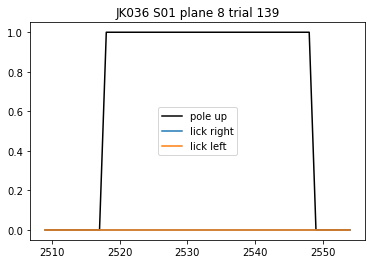

In [65]:
# trial_ind = 65
# trial_num = frame_time_df.trialNum.unique()[trial_ind]
trial_num = 139
trial_df = frame_time_df[frame_time_df.trialNum == trial_num]
fig, ax = plt.subplots()
ax.plot(trial_df.pole_up_frame, 'k', label='pole up')
ax.plot(trial_df.num_lick_right, label='lick right')
ax.plot(trial_df.num_lick_left, label='lick left')
ax.legend()
ax.set_title(f'JK{mouse:03d} S{session_num:02d} plane {plane} trial {trial_num}')

(2300.0, 2800.0)

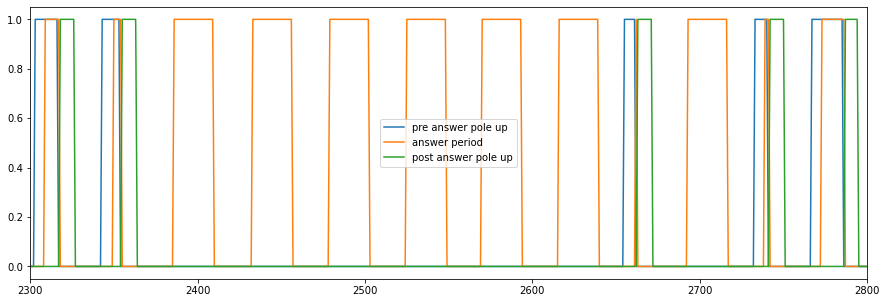

In [63]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(frame_time_df.pre_answer_pole_up_frame, label='pre answer pole up')
ax.plot(frame_time_df.answer_period_frame, label='answer period')
ax.plot(frame_time_df.post_answer_pole_up_frame, label='post answer pole up')
ax.legend()
ax.set_xlim([2300,2800])

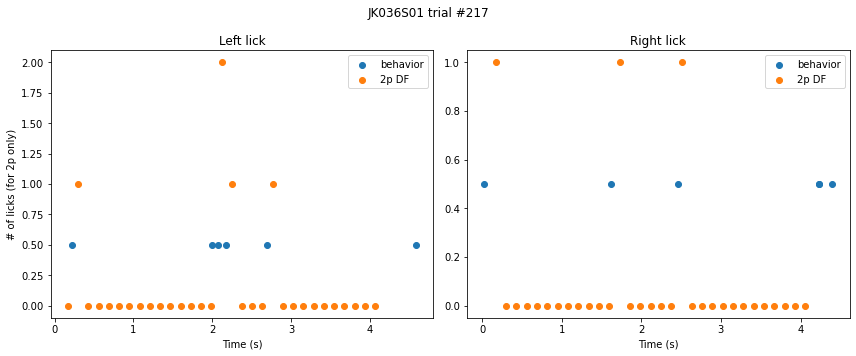

In [69]:
trial_ind = 105
trial_num = frame_time_df.trialNum.unique()[trial_ind]

behavior_trial_series = behavior_df[behavior_df.index==trial_num].iloc[0]
frame_time_df_trial = frame_time_df[frame_time_df.trialNum==trial_num]

left_lick_times = behavior_trial_series.beamBreakTimesLeft
if np.size(left_lick_times)==1:
    left_lick_times = np.array([left_lick_times])    
right_lick_times = behavior_trial_series.beamBreakTimesRight
if np.size(right_lick_times)==1:
    right_lick_times = np.array([right_lick_times])
answer_lick_time = behavior_trial_series.answerLickTime
if answer_lick_time != 0: # answer trial
    if (answer_lick_time not in left_lick_times) and (answer_lick_time not in right_lick_times): # In some rare cases
        if behavior_trial_series.choice == 'r':
            right_lick_times = np.union1d(answer_lick_time, right_lick_times)
        elif behavior_trial_series.choice == 'l':
            left_lick_times = np.union1d(answer_lick_time, left_lick_times)
        else:
            raise('When the answer lick time is not 0, there must have been either r or l choice.')

%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(left_lick_times, np.ones(len(left_lick_times))*0.5, label='behavior')
ax[0].scatter(frame_time_df_trial.frame_end_time.values, frame_time_df_trial.num_lick_left.values, label='2p DF')
ax[0].set_ylabel('# of licks (for 2p only)')
ax[0].legend()
ax[0].set_title('Left lick')
ax[0].set_xlabel('Time (s)')
ax[1].scatter(right_lick_times, np.ones(len(right_lick_times))*0.5, label='behavior')
ax[1].scatter(frame_time_df_trial.frame_end_time.values, frame_time_df_trial.num_lick_right.values, label='2p DF')
ax[1].legend()
ax[1].set_title('Right lick')
ax[1].set_xlabel('Time (s)')
fig.suptitle(f'JK{mouse:03d}S{session_num:02d} trial #{trial_num}')
fig.tight_layout()

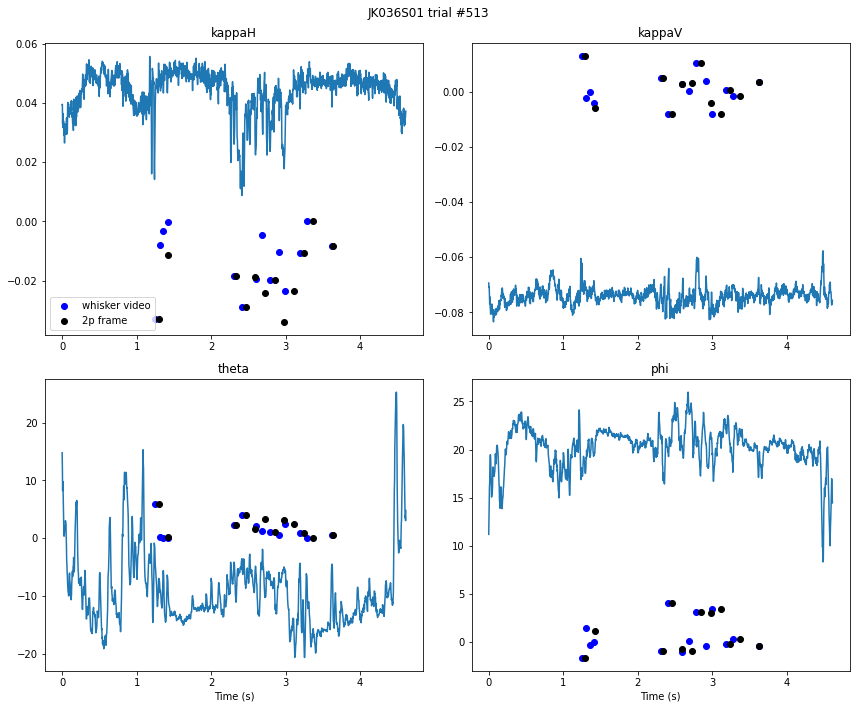

In [76]:
# Compare delta values between those calculated in whisker df and time frame df
trial_num_ind = 251
trial_num = frame_time_df.trialNum.unique()[trial_num_ind]
trial_whisker_series = whisker_df[whisker_df.index==trial_num]
trial_whisker_time = trial_whisker_series.whisker_time.values[0]

trial_2p_index = np.where(frame_time_df.trialNum==trial_num)[0]
trial_2p_time = frame_time_df.frame_end_time.values[trial_2p_index]

trial_2p_delta_kappaH = frame_time_df.delta_kappaH.values[trial_2p_index]
trial_2p_delta_kappaV = frame_time_df.delta_kappaV.values[trial_2p_index]
trial_2p_delta_theta = frame_time_df.delta_theta.values[trial_2p_index]
trial_2p_delta_phi = frame_time_df.delta_phi.values[trial_2p_index]

delta_kappaH = []
delta_kappaV = []
delta_theta = []
delta_phi = []
touch_time = []

trial_whisker_kappaH = trial_whisker_series.kappaH.values[0]
trial_whisker_kappaV = trial_whisker_series.kappaV.values[0]
trial_whisker_theta = trial_whisker_series.theta.values[0]
trial_whisker_phi = trial_whisker_series.phi.values[0]
trial_whisker_time = trial_whisker_series.whisker_time.values[0]

for chunk in trial_whisker_series.protractionTFchunksByWhisking.values[0]:
    if np.ndim(chunk)==0:
        chunk = np.array([chunk])
    chunk = chunk.astype(int)-1
    touch_time.append(trial_whisker_time[chunk])

    delta_kappaH.append(np.amin(trial_whisker_kappaH[chunk] - trial_whisker_kappaH[chunk[0]]))
    delta_theta.append(np.amax(trial_whisker_theta[chunk] - trial_whisker_theta[chunk[0]]))
    delta_kappaV_chunk = trial_whisker_kappaV[chunk] - trial_whisker_kappaV[chunk[0]]
    delta_kappaV.append(np.amax(np.abs(delta_kappaV_chunk)) * np.sign(delta_kappaV_chunk[np.argmax(np.abs(delta_kappaV_chunk))]))
    delta_phi_chunk = trial_whisker_phi[chunk] - trial_whisker_phi[chunk[0]]
    delta_phi.append(np.amax(np.abs(delta_phi_chunk)) * np.sign(delta_phi_chunk[np.argmax(np.abs(delta_phi_chunk))]))

fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0,0].plot(trial_whisker_time, trial_whisker_kappaH)
ax[0,1].plot(trial_whisker_time, trial_whisker_kappaV)
ax[1,0].plot(trial_whisker_time, trial_whisker_theta)
ax[1,1].plot(trial_whisker_time, trial_whisker_phi)
for i, time in enumerate(touch_time):
    if i == 0:
        ax[0,0].scatter(time[-1], delta_kappaH[i], c='b', label='whisker video')
    else:
        ax[0,0].scatter(time[-1], delta_kappaH[i], c='b')
    ax[0,1].scatter(time[-1], delta_kappaV[i], c='b')
    ax[1,0].scatter(time[-1], delta_theta[i], c='b')
    ax[1,1].scatter(time[-1], delta_phi[i], c='b')
ax[0,0].scatter(trial_2p_time, trial_2p_delta_kappaH, c = 'k', label='2p frame')
ax[0,1].scatter(trial_2p_time, trial_2p_delta_kappaV, c = 'k')
ax[1,0].scatter(trial_2p_time, trial_2p_delta_theta, c = 'k')
ax[1,1].scatter(trial_2p_time, trial_2p_delta_phi, c = 'k')

ax[0,0].legend()

ax[0,0].set_title('kappaH')
ax[0,1].set_title('kappaV')
ax[1,0].set_title('theta')
ax[1,1].set_title('phi')

ax[1,0].set_xlabel('Time (s)')
ax[1,1].set_xlabel('Time (s)')
fig.suptitle(f'JK{mouse:03d}S{session_num:02d} trial #{trial_num}')
fig.tight_layout()